<center><h1>Day 3:  Classifying the Titanic Data Set with Decision Trees</h1></center>

In today's exercise, you'll use sklearn's **_DecisionTreeClassifier_** class to predict whether or not a passenger survived the Titanic disaster based on indicators about them.  

Also, uh, just in case you haven't seen the movie yet, the Titanic crashes. Spoiler Alert (Apologies to James Cameron).

<center><img src="titanic.jpg"></center>

You'll be repeating most of the work you did in the Data Camp tutorial as prework for today's class--, but with one major difference.  This time, it's all up to you. Each stage will prompt you with the basic steps for importing, cleaning, exploring, training, and testing--but the implementation of each stage will be up to you.  Remember to use the documentation for pandas, numpy, and sklearn as necessary.  If you don't know how to do something, use the internet to figure it out until you do.  You'll be presenting your model during the start of Thursday's class.



<center><h2>Step 1:  Importing and Cleaning the Data</h2></center>

The data set is stored in a file in this folder called "titanic.csv".  Use pandas to import the data set into a data frame.  Call the data frame whatever you like.  How will you deal with missing values?  Once your data set is "clean", remember to split it into a training set and a testing set.  In general, you want to have a 70/30 split between your training and testing sets, respectively.

In [4]:
# Import the Data Set here.  Now, clean your data!  Find missing (NaN) values and deal with them in the manner 
# you think is most appropriate!
import pandas as pd
import numpy as np

# remove warnings for chaining
pd.options.mode.chained_assignment = None

# why won't it read out the df unless there's a print statement?
df = pd.read_csv("titanic_data_set.csv")
df.head

#Impute values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna("S")

# create child field
df['Child'] = float('NaN')
df["Child"][df["Age"] >= 18] = 0
df["Child"][df["Age"] < 18] = 1

#create sex field
df["Sex"][df["Sex"] == "male"] = 0
df["Sex"][df["Sex"] == "female"] = 1


# create cabin field -- would'nt function as desired
df["hasCabin"] = float('NaN')
# add value for whether or not this person has a cabin
df["hasCabin"][df['Cabin'] == None] = 0
df["hasCabin"][df['Cabin'] != None] = 1

# Transform embarked variables
df["Embarked"][df["Embarked"] == "S"] = 0
df["Embarked"][df["Embarked"] == "C"] = 1
df["Embarked"][df["Embarked"] == "Q"] = 2

# Split your data set into training and testing sets. In general, you want to reserve
# around 30% of your data for testing.  

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size = 0.7)




In [77]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Child,hasCabin
463,464,0,2,"Milling, Mr. Jacob Christian",0,48.0,0,0,234360,13.0000,NaN,0,0.0,1.0
604,605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",0,35.0,0,0,111426,26.5500,NaN,1,0.0,1.0
61,62,1,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0000,B28,0,0.0,1.0
698,699,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,1,0.0,1.0
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",0,42.0,1,0,243847,27.0000,NaN,0,0.0,1.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",1,28.0,1,0,2689,14.4583,NaN,1,0.0,1.0
152,153,0,3,"Meo, Mr. Alfonzo",0,55.5,0,0,A.5. 11206,8.0500,NaN,0,0.0,1.0
691,692,1,3,"Karun, Miss. Manca",1,4.0,0,1,349256,13.4167,NaN,1,1.0,1.0
321,322,0,3,"Danoff, Mr. Yoto",0,27.0,0,0,349219,7.8958,NaN,0,0.0,1.0
619,620,0,2,"Gavey, Mr. Lawrence",0,26.0,0,0,31028,10.5000,NaN,0,0.0,1.0


<center><h2>Step 2: Exploring the Data</h2></center>

Now, you should explore your data.  Get a feel for it using summary statistics, and graphs!  If you're taking this step seriously, you should be graphing a ton of stuff. Some will end up being useful.  Alot of it won't.  Your job here is to discover which features have the strongest correlation with survival outcomes.  This will become important when we start actually training our Decision Tree Classifier!

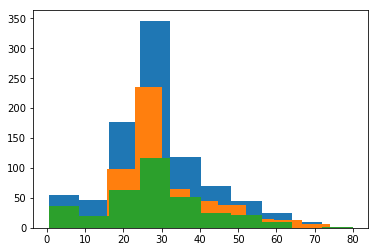

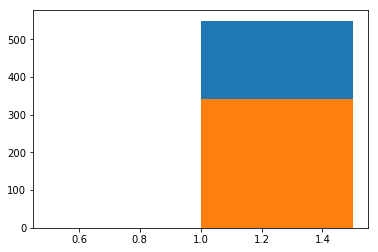

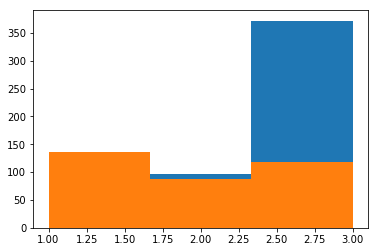

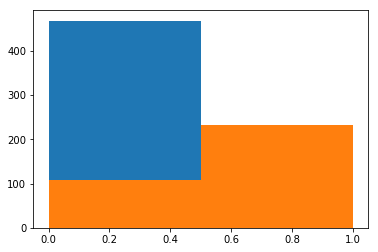

In [5]:
# Explore the data set here.  Try and discover what categories correlate the most with the 
# survival chance of the passengers!
import matplotlib.pyplot as plt


plt.figure(1)
plt.hist(df["Age"], bins = 10)
plt.hist(df["Age"][df["Survived"] == 0], bins = 10)
plt.hist(df["Age"][df["Survived"] == 1], bins = 10)



plt.figure(2)
plt.hist(df["hasCabin"][df["Survived"] == 0], bins = 2)
plt.hist(df["hasCabin"][df["Survived"] == 1], bins = 2)


plt.figure(3)
plt.hist(df["Pclass"][df["Survived"] == 0], bins = 3)
plt.hist(df["Pclass"][df["Survived"] == 1], bins = 3)

plt.figure(4)
plt.hist(df["Sex"][df["Survived"] == 0], bins = 2)
plt.hist(df["Sex"][df["Survived"] == 1], bins = 2)

plt.show()





<center><h2>Step 3: Training a Classifier</h2></center>

You've cleaned your data, and split into training and testing sets, and explored your data frame.  Now, on to the fun stuff--let's create and train a Decision Tree Classifier!  Create a Decision Tree Classifier and fit it to your training set.  If you're not sure how, check out the sklearn docs for Decision Tree Classifiers!

In [6]:
# Create and train a Decision Tree Classifier from sklearn.tree. If you're unsure of how to use the 
# Decision Tree Classifier, check out the docs for it--sklearn has some of the best documentation out there!
from sklearn.tree import tree

target = train["Survived"].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values
features_bayes = train[["Sex", "Fare"]].values


# Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier().fit(features_one, target)

print("decision tree scores")
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

from sklearn.naive_bayes import GaussianNB

bnb = GaussianNB().fit(features_bayes, target)
print(bnb.score(features_bayes, target))




decision tree scores
[ 0.12346111  0.27480783  0.26078075  0.3409503 ]
0.977528089888
0.75922953451


<center><h2>Step 4: Evaluating our Model</h2></center>

We've trained our model, but **_can we trust our results?_** Use your Decision Tree Classifier to predict the outcomes of the items in your testing set.  Now that we have the results of our testing set predictions, let's calculate our F1 Score to see how we did.  If you aren't sure how to calculate the F1 Score, refer to the docs! 

In [7]:
# Evaluate your model's accuracy here.  Use your testing set to do--how will you evaluate your model's accuracy?
from sklearn.metrics import f1_score



features_two = test[["Pclass", "Sex", "Age", "Fare"]].values
target_two = test["Survived"].values

features_two_bayes = test[["Sex", "Fare"]].values

# Decision tree prediction
predict = my_tree_one.predict(features_two)
score = f1_score(target_two, predict)
print(score)


## Bayes Model prediction

bayes_predict = bnb.predict(features_two_bayes)
bayes_score = f1_score(target_two, bayes_predict)

print(bayes_score)




0.75
0.773869346734


<center><h2>Stretch Challenge: Tuning our Model for Higher Accuracy</h2></center>

Great job!  Now, tweak your model to see how much higher you can get your accuracy score!  Gloves are off--get that F1 Score up.  Every percentage point counts!

(Hint:  Take a look at sklearn's GridSearchCV module!)

In [12]:
# Stretch challenge--can you tweak your model to get the accuracy up?  How high can you get your accuracy?

